In [65]:
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torch.utils.data import Dataset, DataLoader
import os 
from warnings import simplefilter

In [66]:
import models
import class_sampling
import train
import metric_utils

In [67]:
NUM_CLASSES = 10
NUM_CLASSES_REDUCED = 2
n_epochs = 20
batch_size_train = 64
batch_size_test = 1000
momentum = 0.5

ratio = (10, 1)

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

nums = (6, 8)

DIRECTORY = f"results/learning_rate_results_{str(nums[0])}{str(nums[1])}"
RATIO_STR = str(ratio[0])


simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)
simplefilter(action='ignore', category=DeprecationWarning)

In [68]:
train_mnist = torchvision.datasets.MNIST('mnist', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor() ]))
                             


test_mnist = torchvision.datasets.MNIST('mnist', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor() ]))
                             
                            

reduced_train_mnist = class_sampling.Reduce(train_mnist, NUM_CLASSES_REDUCED, nums=nums)
reduced_test_mnist = class_sampling.Reduce(test_mnist, NUM_CLASSES_REDUCED, nums=nums)


reduced_train_mnist_ratio = class_sampling.BinaryRatio(train_mnist, 2, ratio, nums=nums)

In [69]:
train_loader_reduced = DataLoader(reduced_train_mnist, batch_size=batch_size_train, shuffle=False) 
train_loader_reduced_ratio = DataLoader(reduced_train_mnist_ratio, batch_size=batch_size_train, shuffle=False)
train_loader_normal = DataLoader(train_mnist, batch_size=batch_size_train, shuffle=False)

test_loader_reduced = DataLoader(reduced_test_mnist, batch_size=batch_size_test, shuffle=False) 
test_loader_normal = DataLoader(test_mnist, batch_size=batch_size_test, shuffle=False)


Test set: Avg. loss: 0.018764169073006133, AUC: 0.4259660355034659


Test set: Avg. loss: 7085810979468.985, AUC: 0.5


Test set: Avg. loss: 15760526436322.318, AUC: 0.5


Test set: Avg. loss: 426501110790.3602, AUC: 0.9567406000694465


Test set: Avg. loss: 249604685315.1801, AUC: 0.9666742400534996


Test set: Avg. loss: 194532047471.30435, AUC: 0.9703362583753798


Test set: Avg. loss: 144257222304.06625, AUC: 0.976085959369494


Test set: Avg. loss: 124564109663.93375, AUC: 0.9776517213736696


Test set: Avg. loss: 103710833432.91098, AUC: 0.9802784720049041


Test set: Avg. loss: 95384699287.05591, AUC: 0.9802613247139618


Test set: Avg. loss: 86109617972.47205, AUC: 0.9807832453820202


Test set: Avg. loss: 75705327768.64597, AUC: 0.9834014223677837


Test set: Avg. loss: 72939665149.3499, AUC: 0.9812965924046074


Test set: Avg. loss: 65535120759.25466, AUC: 0.9839319166813133


Test set: Avg. loss: 62113541287.48654, AUC: 0.9839233430358422


Test set: Avg. loss: 61426853179.


Test set: Avg. loss: 291266442089.4741, AUC: 0.9583063620736219


Test set: Avg. loss: 184953818058.99792, AUC: 0.9671875870760869


Test set: Avg. loss: 141767694467.44513, AUC: 0.9724067937566715


Test set: Avg. loss: 110589659157.20082, AUC: 0.9750421180333773


Test set: Avg. loss: 101649056218.89854, AUC: 0.976582159101139


Test set: Avg. loss: 82460203342.97308, AUC: 0.9792089097323737


Test set: Avg. loss: 75854084447.93375, AUC: 0.9792003360869025


Test set: Avg. loss: 63354043601.8882, AUC: 0.9844281164129581


Test set: Avg. loss: 59689722042.56729, AUC: 0.983367127785899


Test set: Avg. loss: 57017759349.6646, AUC: 0.9833842750768412


Test set: Avg. loss: 55510965407.00621, AUC: 0.9833499804949565


Test set: Avg. loss: 51353501594.23602, AUC: 0.9854376631671902


Test set: Avg. loss: 47720269879.122154, AUC: 0.9859595838352487


Test set: Avg. loss: 49982588881.35818, AUC: 0.9864643572123649


Test set: Avg. loss: 48988062306.583855, AUC: 0.9843766745401311


Test se

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 54309023769.440994, AUC: 0.9849414634355455


Test set: Avg. loss: 49898845542.294, AUC: 0.9854462368126615


Test set: Avg. loss: 46146993938.55073, AUC: 0.9854462368126615



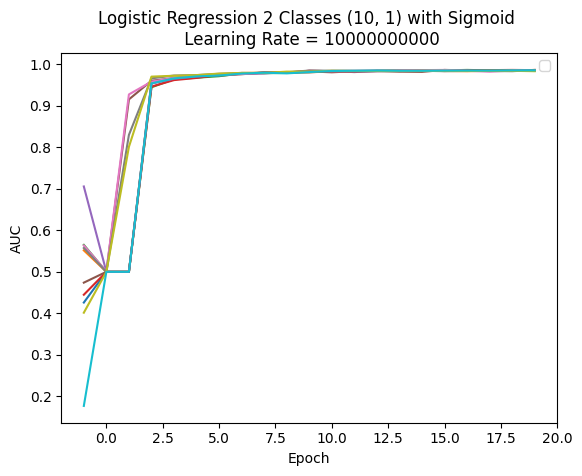

In [70]:
# SIGMOID 2 CLASS RATIO 
# the AUC isn't saving? 


learning_rates = [10000000000]

for learning_rate in learning_rates:
    aucs = []
    for i in range(10):
        model_aucs = []
        network = models.SigmoidLogisticRegression(NUM_CLASSES_REDUCED)
        optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
        _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network) 
        model_aucs.append(auc)
        for epoch in range(n_epochs):
            directory = f"{DIRECTORY}/sigmoid/{str(learning_rate)}/ratio{i}_{RATIO_STR}/model{epoch}"
           #_, _ = train.train_sigmoid(epoch, train_loader_reduced_ratio, network, optimizer, verbose=False, directory=directory)
            _, _ = train.train_sigmoid(epoch, train_loader_reduced_ratio, network, optimizer, verbose=False)
            _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network)
            model_aucs.append(auc)
        aucs.append(model_aucs)
        plt.plot(np.arange(-1, n_epochs), aucs[i])
   # np.save(f'{DIRECTORY}/sigmoid/{str(learning_rate)}/ratio{i}_{RATIO_STR}/aucs', aucs)
    plt.title("Logistic Regression 2 Classes " + str(ratio) + " with Sigmoid \n Learning Rate = " + str(learning_rate))
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()
    plt.show()
   


Test set: Avg. loss: 0.010619169825921386, AUC: 0.7145172165782613


Test set: Avg. loss: 1.2553008095310654, AUC: 0.9862244897959184


Test set: Avg. loss: 0.0544054721264129, AUC: 0.9977276813809224


Test set: Avg. loss: 0.05757454946531471, AUC: 0.9972871527465612


Test set: Avg. loss: 0.06860961192606753, AUC: 0.9972871527465612


Test set: Avg. loss: 0.05337723535848848, AUC: 0.9977973568281938


Test set: Avg. loss: 0.060264857948249116, AUC: 0.9977973568281938


Test set: Avg. loss: 0.06124515939266124, AUC: 0.9977973568281938


Test set: Avg. loss: 0.061795191843740764, AUC: 0.9977973568281938


Test set: Avg. loss: 0.06117850770341589, AUC: 0.9977973568281938


Test set: Avg. loss: 0.06117850770341589, AUC: 0.9977973568281938


Test set: Avg. loss: 0.06117850770341589, AUC: 0.9977973568281938


Test set: Avg. loss: 0.06117850770341589, AUC: 0.9977973568281938


Test set: Avg. loss: 0.06117850770341589, AUC: 0.9977973568281938


Test set: Avg. loss: 0.06117850770341589, AUC:


Test set: Avg. loss: 0.05396466807552545, AUC: 0.9982378854625551


Test set: Avg. loss: 0.05396466807552545, AUC: 0.9982378854625551


Test set: Avg. loss: 0.011936660072200405, AUC: 0.6472489436303155


Test set: Avg. loss: 24.719636755688533, AUC: 0.9096938775510204


Test set: Avg. loss: 0.09695778343976248, AUC: 0.9981682100152836


Test set: Avg. loss: 0.08567639349763839, AUC: 0.9982378854625551


Test set: Avg. loss: 0.14650170075977947, AUC: 0.9969162995594714


Test set: Avg. loss: 0.23034190365045065, AUC: 0.9969162995594714


Test set: Avg. loss: 0.24988784970403, AUC: 0.9969162995594714


Test set: Avg. loss: 0.20278685369108304, AUC: 0.9969162995594714


Test set: Avg. loss: 0.2276745302457336, AUC: 0.9969162995594714


Test set: Avg. loss: 0.2274046985815603, AUC: 0.9964757709251102


Test set: Avg. loss: 0.19734095219461067, AUC: 0.9964757709251102


Test set: Avg. loss: 0.19813019592429448, AUC: 0.9964757709251102


Test set: Avg. loss: 0.18163813597767065, AUC: 0.997

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.38336885781434693, AUC: 0.9969162995594714


Test set: Avg. loss: 0.38336885781434693, AUC: 0.9969162995594714



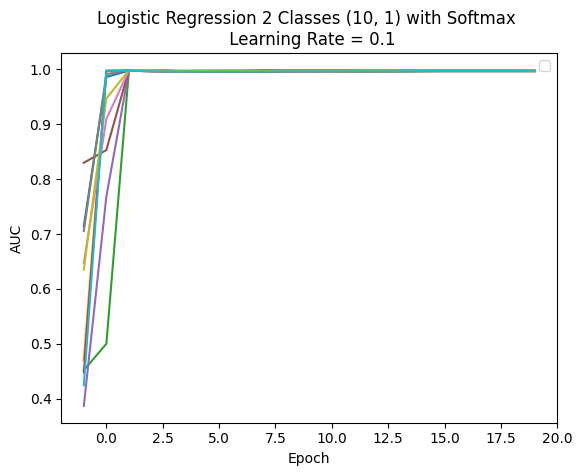


Test set: Avg. loss: 0.020446160949995615, AUC: 0.6975231502292547


Test set: Avg. loss: 0.4103910946676917, AUC: 0.9887755102040816


Test set: Avg. loss: 0.006214857439622811, AUC: 0.9981682100152836


Test set: Avg. loss: 0.005837507507197964, AUC: 0.9982378854625551


Test set: Avg. loss: 0.011685109871217264, AUC: 0.9969162995594714


Test set: Avg. loss: 0.020069125921731865, AUC: 0.9969162995594714


Test set: Avg. loss: 0.018778786084330673, AUC: 0.9969162995594714


Test set: Avg. loss: 0.01862836256094858, AUC: 0.9969162995594714


Test set: Avg. loss: 0.01880583075485049, AUC: 0.9964757709251102


Test set: Avg. loss: 0.015799447097958684, AUC: 0.9964757709251102


Test set: Avg. loss: 0.016360336556220448, AUC: 0.9969162995594714


Test set: Avg. loss: 0.012629429161125886, AUC: 0.9977973568281938


Test set: Avg. loss: 0.013915335202048011, AUC: 0.9977973568281938


Test set: Avg. loss: 0.01698755485228049, AUC: 0.9977973568281938


Test set: Avg. loss: 0.019486759176772


Test set: Avg. loss: 0.022907252570979704, AUC: 0.9973568281938325


Test set: Avg. loss: 0.020780765362101526, AUC: 0.9973568281938325


Test set: Avg. loss: 0.020780765362101526, AUC: 0.9973568281938325


Test set: Avg. loss: 0.020780765362101526, AUC: 0.9973568281938325


Test set: Avg. loss: 0.020780765362101526, AUC: 0.9973568281938325


Test set: Avg. loss: 0.020780765362101526, AUC: 0.9973568281938325


Test set: Avg. loss: 0.017781897019550873, AUC: 0.5268093140339836


Test set: Avg. loss: 0.05079935966654027, AUC: 0.9938775510204081


Test set: Avg. loss: 0.009446127871249585, AUC: 0.9964757709251102


Test set: Avg. loss: 0.0030634594865442733, AUC: 0.9977973568281938


Test set: Avg. loss: 0.010572449253524166, AUC: 0.9964757709251102


Test set: Avg. loss: 0.009935690381566402, AUC: 0.9969162995594714


Test set: Avg. loss: 0.00780882328114611, AUC: 0.9977973568281938


Test set: Avg. loss: 0.010772311884742538, AUC: 0.9969162995594714


Test set: Avg. loss: 0.01077231188

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.028804168520807936, AUC: 0.9969162995594714


Test set: Avg. loss: 0.028804168520807936, AUC: 0.9969162995594714



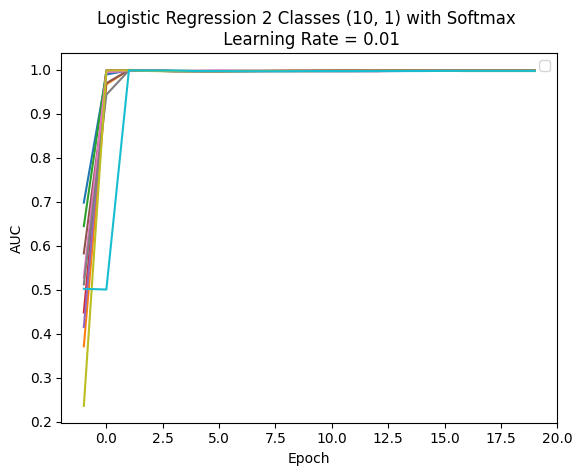


Test set: Avg. loss: 0.08655797539027871, AUC: 0.5167917827924121


Test set: Avg. loss: 0.010416749295895263, AUC: 0.9975186550391082


Test set: Avg. loss: 0.0025390119980976656, AUC: 0.9977973568281938


Test set: Avg. loss: 0.00382420725010811, AUC: 0.9964757709251102


Test set: Avg. loss: 0.004030717912858823, AUC: 0.9960352422907489


Test set: Avg. loss: 0.004974284070603391, AUC: 0.9960352422907489


Test set: Avg. loss: 0.005214184452174121, AUC: 0.9960352422907489


Test set: Avg. loss: 0.005299438765144799, AUC: 0.9960352422907489


Test set: Avg. loss: 0.004168635451765489, AUC: 0.9964757709251102


Test set: Avg. loss: 0.004311011249010162, AUC: 0.9964757709251102


Test set: Avg. loss: 0.0041372100794005336, AUC: 0.9964757709251102


Test set: Avg. loss: 0.003926136364046282, AUC: 0.9964757709251102


Test set: Avg. loss: 0.0035740055372810815, AUC: 0.9969162995594714


Test set: Avg. loss: 0.003933632852901522, AUC: 0.9964757709251102


Test set: Avg. loss: 0.003904732


Test set: Avg. loss: 0.0025647430555194826, AUC: 0.9964757709251102


Test set: Avg. loss: 0.0026540184697360857, AUC: 0.9969162995594714


Test set: Avg. loss: 0.0026540184697360857, AUC: 0.9969162995594714


Test set: Avg. loss: 0.0026540184697360857, AUC: 0.9969162995594714


Test set: Avg. loss: 0.0026540184697360857, AUC: 0.9969162995594714


Test set: Avg. loss: 0.0026540184697360857, AUC: 0.9969162995594714


Test set: Avg. loss: 0.0026540184697360857, AUC: 0.9969162995594714


Test set: Avg. loss: 0.06483490134525524, AUC: 0.19767149150409064


Test set: Avg. loss: 0.011855361816730905, AUC: 0.9979591836734694


Test set: Avg. loss: 0.002481639131586602, AUC: 0.9977973568281938


Test set: Avg. loss: 0.003133424264037581, AUC: 0.9964757709251102


Test set: Avg. loss: 0.004040039008390819, AUC: 0.9960352422907489


Test set: Avg. loss: 0.004616153212021992, AUC: 0.9960352422907489


Test set: Avg. loss: 0.005561027571946453, AUC: 0.9960352422907489


Test set: Avg. loss: 0.004

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.0012795943458593201, AUC: 0.9955947136563876


Test set: Avg. loss: 0.0012795943458593201, AUC: 0.9955947136563876


Test set: Avg. loss: 0.0012795943458593201, AUC: 0.9955947136563876



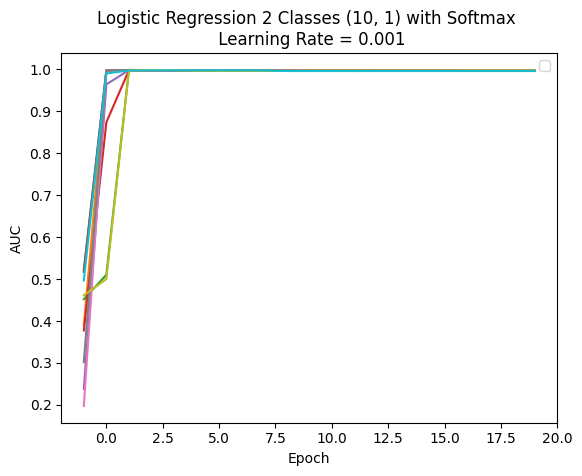


Test set: Avg. loss: 0.038096771059870436, AUC: 0.4992065989391351


Test set: Avg. loss: 0.04211903204590998, AUC: 0.5663265306122449


Test set: Avg. loss: 0.00011459692396734342, AUC: 0.9980985345680122


Test set: Avg. loss: 0.00023360866723014107, AUC: 0.9973568281938325


Test set: Avg. loss: 0.00022912054514208585, AUC: 0.9973568281938325


Test set: Avg. loss: 0.00023667294681776782, AUC: 0.9973568281938325


Test set: Avg. loss: 0.0002947783216517022, AUC: 0.9964757709251102


Test set: Avg. loss: 0.00029372212875537556, AUC: 0.9964757709251102


Test set: Avg. loss: 0.000302901547005836, AUC: 0.9969162995594714


Test set: Avg. loss: 0.0003251721813887287, AUC: 0.9969162995594714


Test set: Avg. loss: 0.0003255429560974698, AUC: 0.9969162995594714


Test set: Avg. loss: 0.0003410429819255856, AUC: 0.9969162995594714


Test set: Avg. loss: 0.0003671531277063609, AUC: 0.9969162995594714


Test set: Avg. loss: 0.0003374009549476858, AUC: 0.9969162995594714


Test set: Avg. los


Test set: Avg. loss: 0.00026466091192078645, AUC: 0.9960352422907489


Test set: Avg. loss: 0.00026041477848170216, AUC: 0.9960352422907489


Test set: Avg. loss: 0.0002633046667062926, AUC: 0.9960352422907489


Test set: Avg. loss: 0.000262476415780701, AUC: 0.9960352422907489


Test set: Avg. loss: 0.00026193012441585534, AUC: 0.9960352422907489


Test set: Avg. loss: 0.0002615100737159134, AUC: 0.9960352422907489


Test set: Avg. loss: 0.00026116679041661835, AUC: 0.9960352422907489


Test set: Avg. loss: 0.0002608755167494429, AUC: 0.9960352422907489


Test set: Avg. loss: 0.024157223802931765, AUC: 0.6520812730378495


Test set: Avg. loss: 0.012047761664604747, AUC: 0.9571428571428571


Test set: Avg. loss: 0.00024671146632931754, AUC: 0.9981682100152836


Test set: Avg. loss: 0.00018715962732373682, AUC: 0.9977276813809224


Test set: Avg. loss: 0.0001829493021528241, AUC: 0.9977973568281938


Test set: Avg. loss: 0.00025549929404089636, AUC: 0.9969162995594714


Test set: Avg. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.00022564415531519175, AUC: 0.9969162995594714



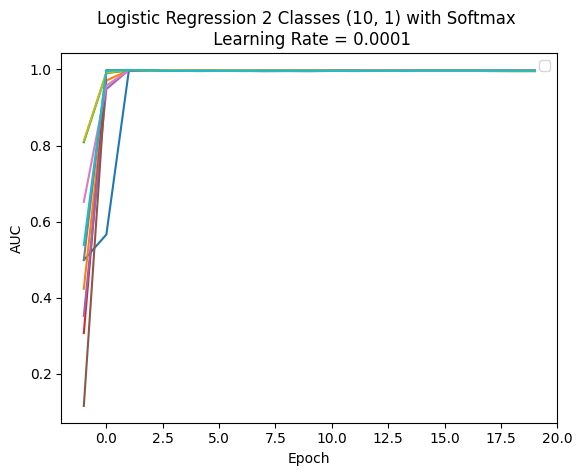


Test set: Avg. loss: 0.008355770156174969, AUC: 0.7850961970691359


Test set: Avg. loss: 0.00030128933647845653, AUC: 0.9889620605951631


Test set: Avg. loss: 0.00025701656514871206, AUC: 0.992742515508406


Test set: Avg. loss: 0.00024537132881211895, AUC: 0.9932527195900385


Test set: Avg. loss: 0.00024568947741044044, AUC: 0.9928121909556774


Test set: Avg. loss: 0.00023548949606734247, AUC: 0.9942731277533039


Test set: Avg. loss: 0.00022988592144586233, AUC: 0.9942731277533039


Test set: Avg. loss: 0.0002246490659865927, AUC: 0.9942731277533039


Test set: Avg. loss: 0.00020877931786626226, AUC: 0.9947136563876652


Test set: Avg. loss: 0.00019574095561096432, AUC: 0.9951541850220265


Test set: Avg. loss: 0.00018980963233787893, AUC: 0.9960352422907489


Test set: Avg. loss: 0.00018588722844214024, AUC: 0.9960352422907489


Test set: Avg. loss: 0.00018178713730873262, AUC: 0.9960352422907489


Test set: Avg. loss: 0.00017685837835628302, AUC: 0.9960352422907489


Test set:


Test set: Avg. loss: 0.0002954843196463078, AUC: 0.9936932482243999


Test set: Avg. loss: 0.00029502578660951437, AUC: 0.9936932482243999


Test set: Avg. loss: 0.0002971455630963012, AUC: 0.9936932482243999


Test set: Avg. loss: 0.00029922556088044004, AUC: 0.9936932482243999


Test set: Avg. loss: 0.0003013674953586948, AUC: 0.9932527195900385


Test set: Avg. loss: 0.0003035447417139725, AUC: 0.9923716623213162


Test set: Avg. loss: 0.00030575100129941397, AUC: 0.9923716623213162


Test set: Avg. loss: 0.0003079746561411143, AUC: 0.9923716623213162


Test set: Avg. loss: 0.026065242036860038, AUC: 0.47673963858671226


Test set: Avg. loss: 0.005327745194130756, AUC: 0.8877551020408163


Test set: Avg. loss: 0.000281294897621405, AUC: 0.9940641014114897


Test set: Avg. loss: 0.0002467080475168025, AUC: 0.9936932482243999


Test set: Avg. loss: 0.000230072909001763, AUC: 0.9932527195900385


Test set: Avg. loss: 0.00022147057256518245, AUC: 0.9914906050525937


Test set: Avg. los

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.0004375149559749215, AUC: 0.992742515508406



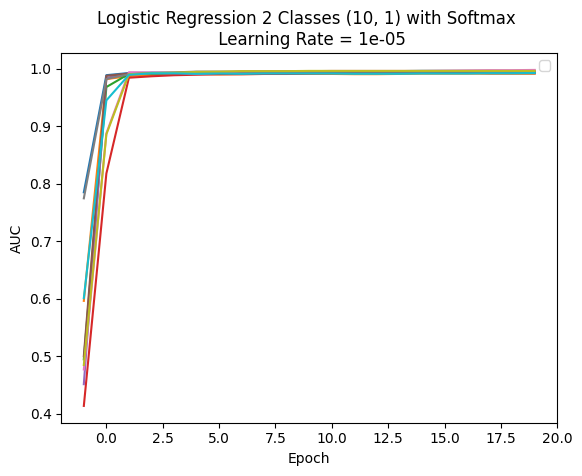


Test set: Avg. loss: 0.039887144661400614, AUC: 0.40801941922143303


Test set: Avg. loss: 0.013322922185803136, AUC: 0.6290389283466692


Test set: Avg. loss: 0.004563079319947155, AUC: 0.8332644070844197


Test set: Avg. loss: 0.002853487597571479, AUC: 0.8889598130000901


Test set: Avg. loss: 0.002125764174946093, AUC: 0.9223253618628068


Test set: Avg. loss: 0.0017168789186094388, AUC: 0.9402252090263419


Test set: Avg. loss: 0.0014570991620949819, AUC: 0.9506360694057359


Test set: Avg. loss: 0.0012777594387108552, AUC: 0.9595859929875034


Test set: Avg. loss: 0.0011621266039832546, AUC: 0.9668434774790973


Test set: Avg. loss: 0.0010848987046144815, AUC: 0.9686055920165423


Test set: Avg. loss: 0.0010193686536017885, AUC: 0.9703677065539873


Test set: Avg. loss: 0.0009630584054523045, AUC: 0.9721994965387035


Test set: Avg. loss: 0.0009152607855785541, AUC: 0.9749123437921425


Test set: Avg. loss: 0.0008732300982689463, AUC: 0.9771149869639485


Test set: Avg. loss: 0.


Test set: Avg. loss: 0.0005302608013153076, AUC: 0.9857637328058977


Test set: Avg. loss: 0.0005219818147925338, AUC: 0.986204261440259


Test set: Avg. loss: 0.00051359716036641, AUC: 0.986204261440259


Test set: Avg. loss: 0.0005048810731152835, AUC: 0.9870853187089812


Test set: Avg. loss: 0.0004959688400827683, AUC: 0.9870853187089812


Test set: Avg. loss: 0.0004870326524648824, AUC: 0.9875955227906139


Test set: Avg. loss: 0.000478101114854745, AUC: 0.9880360514249752


Test set: Avg. loss: 0.08022614787938183, AUC: 0.39155803290479185


Test set: Avg. loss: 0.04685223897298177, AUC: 0.49043648296322934


Test set: Avg. loss: 0.018600058048329454, AUC: 0.7116313045041804


Test set: Avg. loss: 0.006821477497723085, AUC: 0.8333363301267643


Test set: Avg. loss: 0.0032649812968910162, AUC: 0.9033129551380024


Test set: Avg. loss: 0.002059421640761355, AUC: 0.9324350445023825


Test set: Avg. loss: 0.0015471352189427008, AUC: 0.9492223321046481


Test set: Avg. loss: 0.001264

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.0007128235155245372, AUC: 0.9835610896340915


Test set: Avg. loss: 0.0007034979954397142, AUC: 0.984442146902814



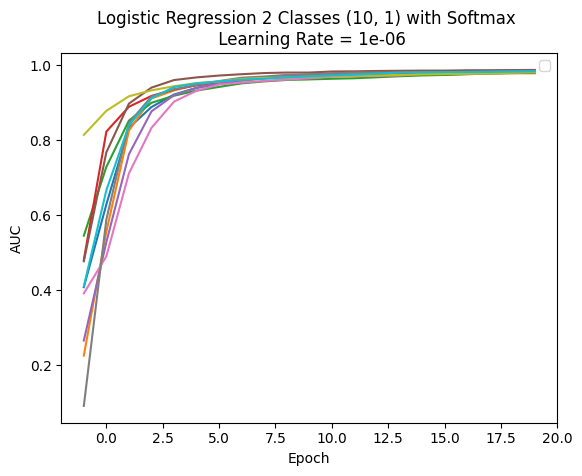


Test set: Avg. loss: 0.06803412290893267, AUC: 0.19865818574125688


Test set: Avg. loss: 0.036184425444185875, AUC: 0.40863526027150954


Test set: Avg. loss: 0.03439807486026845, AUC: 0.4857008001438461


Test set: Avg. loss: 0.032263359448588484, AUC: 0.5122763642902095


Test set: Avg. loss: 0.0297918666902727, AUC: 0.5322417513260811


Test set: Avg. loss: 0.027179361347892887, AUC: 0.5489368875303426


Test set: Avg. loss: 0.024533320487813745, AUC: 0.5640317360424346


Test set: Avg. loss: 0.021950025085016346, AUC: 0.5811898768317899


Test set: Avg. loss: 0.019489248199102163, AUC: 0.6075991189427312


Test set: Avg. loss: 0.017216268047936984, AUC: 0.6355614492493032


Test set: Avg. loss: 0.015180376291838662, AUC: 0.6586082891306302


Test set: Avg. loss: 0.013378496598408295, AUC: 0.6793131349456082


Test set: Avg. loss: 0.011797640509639227, AUC: 0.7072057898049089


Test set: Avg. loss: 0.010446976149899458, AUC: 0.7276094578800683


Test set: Avg. loss: 0.009259151454


Test set: Avg. loss: 0.005326963992829018, AUC: 0.8385777218376337


Test set: Avg. loss: 0.00505093491105605, AUC: 0.8465072372561359


Test set: Avg. loss: 0.004798634283367905, AUC: 0.853625370853187


Test set: Avg. loss: 0.0045668344971136, AUC: 0.8590510653600647


Test set: Avg. loss: 0.0043537349565654785, AUC: 0.8652881416883935


Test set: Avg. loss: 0.0041577854336858075, AUC: 0.8706441607479998


Test set: Avg. loss: 0.003976693615563936, AUC: 0.8743077407174324


Test set: Avg. loss: 0.018225632435322936, AUC: 0.5567832419311337


Test set: Avg. loss: 0.017561103604364057, AUC: 0.5844286613323745


Test set: Avg. loss: 0.016530607778129848, AUC: 0.6076418232491234


Test set: Avg. loss: 0.015378336534432486, AUC: 0.6234559021846624


Test set: Avg. loss: 0.014186771654349974, AUC: 0.6411017711049177


Test set: Avg. loss: 0.013025843392590823, AUC: 0.6587004405286343


Test set: Avg. loss: 0.011900292840691605, AUC: 0.6744673199676346


Test set: Avg. loss: 0.010842405594

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.0012244442957794694, AUC: 0.9327834217387396



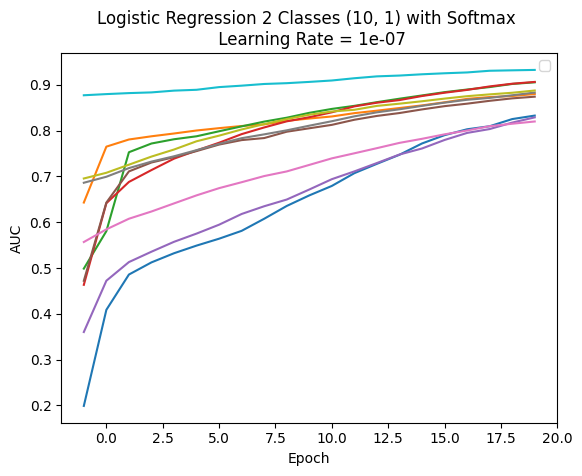

In [49]:
# SOFTMAX 2 CLASS RATIO 

learning_rates = [0.1, 0.01, 0.001, 0.0001, 1e-5, 1e-6, 1e-7]

for learning_rate in learning_rates:
    aucs = []
    for i in range(10):
        model_aucs = []
        network = models.SoftmaxLogisticRegression(NUM_CLASSES_REDUCED)
        optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
        _, auc = metric_utils.auc_softmax(test_loader_reduced, network) 
        model_aucs.append(auc)
        for epoch in range(n_epochs):
            directory = f"{DIRECTORY}/softmax/{str(learning_rate)}/ratio{i}_{RATIO_STR}/model{epoch}"
            _, _ = train.train_softmax(epoch, train_loader_reduced_ratio, network, optimizer, verbose=False, directory=directory)
            _, auc = metric_utils.auc_softmax(test_loader_reduced, network)
            model_aucs.append(auc)
        aucs.append(model_aucs)
        plt.plot(np.arange(-1, n_epochs), aucs[i])
    np.save(f'{DIRECTORY}/softmax/{str(learning_rate)}/ratio{i}_{RATIO_STR}/aucs', aucs)
    plt.title("Logistic Regression 2 Classes " + str(ratio) + " with Softmax \n Learning Rate = " + str(learning_rate))
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()
    plt.show()
  


Test set: Avg. loss: 0.013497034708658854, AUC: 0.554149510024274


Test set: Avg. loss: 0.05449843530677453, AUC: 0.9994897959183673


Test set: Avg. loss: 0.0658302347710792, AUC: 0.9990492672840062


Test set: Avg. loss: 0.06355556325709566, AUC: 0.9990492672840062


Test set: Avg. loss: 0.07194497444387306, AUC: 0.9990492672840062


Test set: Avg. loss: 0.06783605580070622, AUC: 0.9990492672840062


Test set: Avg. loss: 0.09795831540515801, AUC: 0.9990492672840062


Test set: Avg. loss: 0.07869282242254162, AUC: 0.9990492672840062


Test set: Avg. loss: 0.08352178411280856, AUC: 0.9990492672840062


Test set: Avg. loss: 0.05727927814420515, AUC: 0.9990492672840062


Test set: Avg. loss: 0.03905096347168546, AUC: 0.9990492672840062


Test set: Avg. loss: 0.044259631154666836, AUC: 0.9990492672840062


Test set: Avg. loss: 0.044259631154666836, AUC: 0.9990492672840062


Test set: Avg. loss: 0.044259631154666836, AUC: 0.9990492672840062


Test set: Avg. loss: 0.044259631154666836, AU


Test set: Avg. loss: 0.004496559972740516, AUC: 0.9991189427312775


Test set: Avg. loss: 0.004496559972740516, AUC: 0.9991189427312775


Test set: Avg. loss: 0.004496559972740516, AUC: 0.9991189427312775


Test set: Avg. loss: 0.004496559972740516, AUC: 0.9991189427312775


Test set: Avg. loss: 0.004496559972740516, AUC: 0.9991189427312775


Test set: Avg. loss: 0.027882053384262338, AUC: 0.4771500494470916


Test set: Avg. loss: 0.0, AUC: 1.0


Test set: Avg. loss: 0.021577661031808696, AUC: 0.9994897959183673


Test set: Avg. loss: 0.003669217517753583, AUC: 0.9995594713656388


Test set: Avg. loss: 0.010738267740741126, AUC: 0.998608738649645


Test set: Avg. loss: 0.03521648794764886, AUC: 0.998608738649645


Test set: Avg. loss: 0.02865428789287594, AUC: 0.998608738649645


Test set: Avg. loss: 0.056789303051382654, AUC: 0.998608738649645


Test set: Avg. loss: 0.08974018728197607, AUC: 0.9990492672840062


Test set: Avg. loss: 0.09227798475441358, AUC: 0.9990492672840062


Test

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.10322404595413388, AUC: 0.9990492672840062



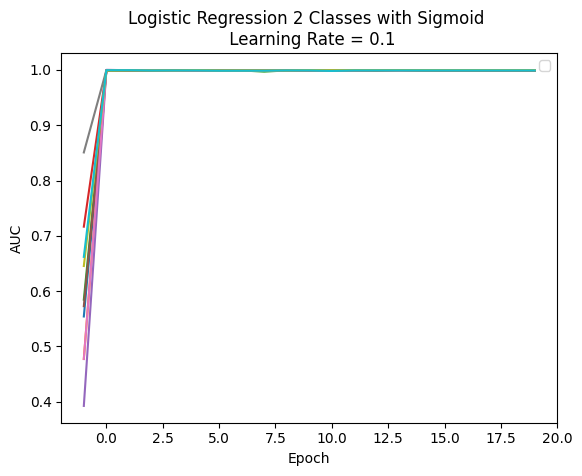


Test set: Avg. loss: 0.026960743572695036, AUC: 0.47611930234648925


Test set: Avg. loss: 6.777145338396654e-05, AUC: 0.9995594713656388


Test set: Avg. loss: 0.000744386429482318, AUC: 0.9991189427312775


Test set: Avg. loss: 0.000786815974729281, AUC: 0.9991189427312775


Test set: Avg. loss: 0.000626394314687021, AUC: 0.9995594713656388


Test set: Avg. loss: 0.001017188574969064, AUC: 0.9991189427312775


Test set: Avg. loss: 0.0006991069649410022, AUC: 0.9991189427312775


Test set: Avg. loss: 0.0011700276223762097, AUC: 0.9991189427312775


Test set: Avg. loss: 0.0006290755514275661, AUC: 0.9990492672840062


Test set: Avg. loss: 0.0010069907979762302, AUC: 0.9991189427312775


Test set: Avg. loss: 0.0008412530236210383, AUC: 0.9991189427312775


Test set: Avg. loss: 0.001693625793953032, AUC: 0.9990492672840062


Test set: Avg. loss: 0.0008213499759105925, AUC: 0.9986784140969163


Test set: Avg. loss: 0.0006210921785791997, AUC: 0.9990492672840062


Test set: Avg. loss: 0.0


Test set: Avg. loss: 0.006261361525977475, AUC: 0.9990492672840062


Test set: Avg. loss: 0.006261361525977475, AUC: 0.9990492672840062


Test set: Avg. loss: 0.006261361525977475, AUC: 0.9990492672840062


Test set: Avg. loss: 0.006261361525977475, AUC: 0.9990492672840062


Test set: Avg. loss: 0.006261361525977475, AUC: 0.9990492672840062


Test set: Avg. loss: 0.006261361525977475, AUC: 0.9990492672840062


Test set: Avg. loss: 0.006929975987607987, AUC: 0.8117639126135037


Test set: Avg. loss: 0.006640726905624354, AUC: 0.9994897959183673


Test set: Avg. loss: 0.007343268789016327, AUC: 0.9994897959183673


Test set: Avg. loss: 0.004985338576296542, AUC: 0.9994897959183673


Test set: Avg. loss: 0.004556113974704247, AUC: 0.9990492672840062


Test set: Avg. loss: 0.008028721302113635, AUC: 0.9990492672840062


Test set: Avg. loss: 0.004474244106464071, AUC: 0.998608738649645


Test set: Avg. loss: 0.006815121698041334, AUC: 0.998608738649645


Test set: Avg. loss: 0.010409224005

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.0022357990978457403, AUC: 0.9990492672840062


Test set: Avg. loss: 0.0022357990978457403, AUC: 0.9990492672840062



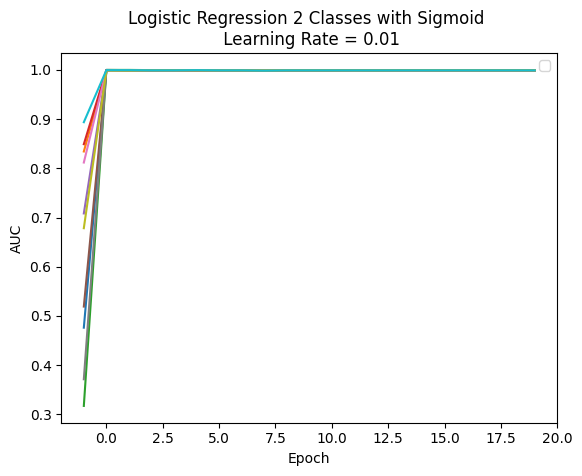


Test set: Avg. loss: 0.0056681091903794745, AUC: 0.904322574844916


Test set: Avg. loss: 3.544719577117451e-05, AUC: 1.0


Test set: Avg. loss: 7.871584548454195e-05, AUC: 0.9995590218466242


Test set: Avg. loss: 6.739526071165188e-05, AUC: 0.9995590218466242


Test set: Avg. loss: 5.56519972798954e-05, AUC: 0.9995590218466242


Test set: Avg. loss: 0.00011090178298048375, AUC: 0.9995581228085949


Test set: Avg. loss: 8.791319624289728e-05, AUC: 0.9995581228085949


Test set: Avg. loss: 0.00030933572750001373, AUC: 0.9990488177649915


Test set: Avg. loss: 0.00035153344167885203, AUC: 0.9990488177649915


Test set: Avg. loss: 0.00036198384091081913, AUC: 0.9990488177649915


Test set: Avg. loss: 0.000308518678865816, AUC: 0.9990488177649915


Test set: Avg. loss: 0.00036749042588204636, AUC: 0.9990488177649915


Test set: Avg. loss: 0.0003673477375760992, AUC: 0.9990488177649915


Test set: Avg. loss: 0.0003672185202016898, AUC: 0.9990488177649915


Test set: Avg. loss: 0.000367100


Test set: Avg. loss: 0.00026041048955410085, AUC: 0.9994893463993527


Test set: Avg. loss: 0.0002606292688959316, AUC: 0.9994893463993527


Test set: Avg. loss: 0.000260813777328383, AUC: 0.9994893463993527


Test set: Avg. loss: 0.0002609741585615397, AUC: 0.9994893463993527


Test set: Avg. loss: 0.00026111643294634266, AUC: 0.9994893463993527


Test set: Avg. loss: 0.00026124482071709687, AUC: 0.9994893463993527


Test set: Avg. loss: 0.0002613618142075009, AUC: 0.9994893463993527


Test set: Avg. loss: 0.03725803636771849, AUC: 0.5066205160478289


Test set: Avg. loss: 0.0, AUC: 1.0


Test set: Avg. loss: 7.549971699996479e-05, AUC: 0.9994893463993527


Test set: Avg. loss: 5.43893088122068e-05, AUC: 0.9995585723276096


Test set: Avg. loss: 7.506092706470624e-05, AUC: 0.9995585723276096


Test set: Avg. loss: 7.961080993039106e-05, AUC: 0.9995576732895802


Test set: Avg. loss: 0.00029299083049133876, AUC: 0.9990488177649915


Test set: Avg. loss: 0.0004714609214036459, AUC: 0.9

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 6.887124538703449e-05, AUC: 0.9999982019239414


Test set: Avg. loss: 6.908695290556473e-05, AUC: 0.9999982019239414



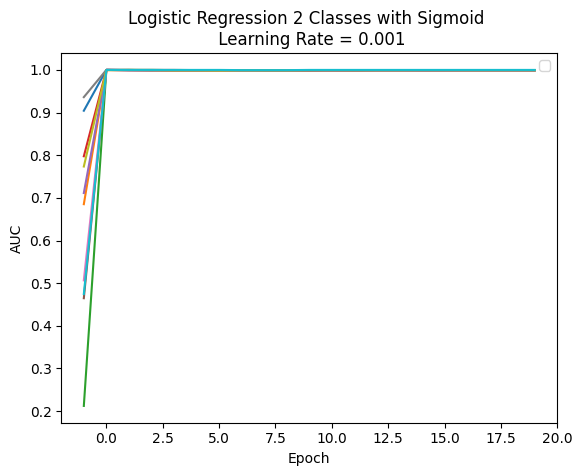


Test set: Avg. loss: 0.008725119200722263, AUC: 0.754188618178549


Test set: Avg. loss: 2.624955420199579e-05, AUC: 1.0


Test set: Avg. loss: 2.398217691138469e-06, AUC: 0.9999982019239413


Test set: Avg. loss: 2.325313286572519e-06, AUC: 0.9999991009619706


Test set: Avg. loss: 3.7209572959518247e-06, AUC: 0.9999991009619706


Test set: Avg. loss: 5.459575748718377e-06, AUC: 0.9999982019239413


Test set: Avg. loss: 7.6195950582447344e-06, AUC: 0.9999982019239414


Test set: Avg. loss: 1.1838588728206166e-05, AUC: 0.999997302885912


Test set: Avg. loss: 1.781544362989653e-05, AUC: 0.9999964038478827


Test set: Avg. loss: 1.8546002477750923e-05, AUC: 0.9999964038478827


Test set: Avg. loss: 2.1100486133326876e-05, AUC: 0.999997302885912


Test set: Avg. loss: 1.6042958156824393e-05, AUC: 0.999997302885912


Test set: Avg. loss: 2.659653593074909e-05, AUC: 0.9999964038478827


Test set: Avg. loss: 2.8097108100049954e-05, AUC: 0.9999928076957655


Test set: Avg. loss: 2.678865104


Test set: Avg. loss: 1.697728593242586e-05, AUC: 0.9999955048098534


Test set: Avg. loss: 1.9939083729300376e-05, AUC: 0.9999964038478827


Test set: Avg. loss: 1.7839231143455653e-05, AUC: 0.9999964038478828


Test set: Avg. loss: 1.8172654649820706e-05, AUC: 0.9999964038478828


Test set: Avg. loss: 1.8483710075311923e-05, AUC: 0.9999964038478828


Test set: Avg. loss: 1.864125055616532e-05, AUC: 0.9999964038478827


Test set: Avg. loss: 1.8733116305057824e-05, AUC: 0.9999964038478827


Test set: Avg. loss: 1.878696227363359e-05, AUC: 0.9999964038478828


Test set: Avg. loss: 0.040522265603356325, AUC: 0.1364820641913153


Test set: Avg. loss: 8.127238266648897e-06, AUC: 0.9999982019239414


Test set: Avg. loss: 1.606770316971535e-06, AUC: 1.0


Test set: Avg. loss: 1.210791449552577e-06, AUC: 1.0


Test set: Avg. loss: 7.484846491950947e-07, AUC: 1.0


Test set: Avg. loss: 1.066289258960966e-06, AUC: 1.0


Test set: Avg. loss: 7.290037315677431e-07, AUC: 1.0


Test set: Avg. loss:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 1.040431200229424e-05, AUC: 0.9999955048098534


Test set: Avg. loss: 1.0125682029837906e-05, AUC: 0.9999955048098534



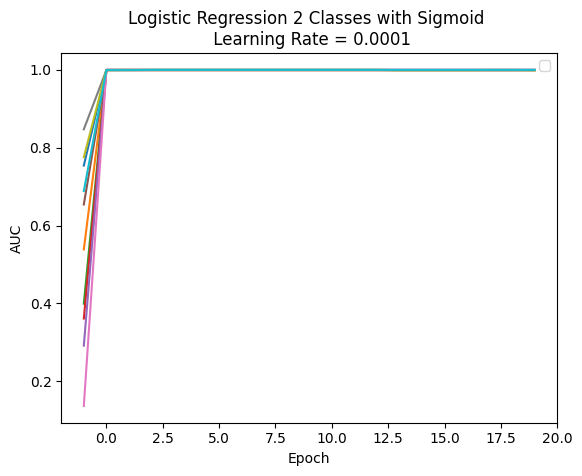


Test set: Avg. loss: 0.025960342822063616, AUC: 0.6470071024004316


Test set: Avg. loss: 0.00024934509707434237, AUC: 0.9991607479996405


Test set: Avg. loss: 0.00019468044263286512, AUC: 0.9993625820372202


Test set: Avg. loss: 0.00016703972698631862, AUC: 0.9994237166232132


Test set: Avg. loss: 0.00014906722130848373, AUC: 0.9994398993077407


Test set: Avg. loss: 0.00013683075894410095, AUC: 0.9994466420929604


Test set: Avg. loss: 0.0001277688936105804, AUC: 0.9994529353591657


Test set: Avg. loss: 0.00012029563818494602, AUC: 0.9989517216578261


Test set: Avg. loss: 0.00011403799980623432, AUC: 0.9989535197338848


Test set: Avg. loss: 0.00010822153282538937, AUC: 0.9989562168479728


Test set: Avg. loss: 0.00010245550003059067, AUC: 0.9989571158860021


Test set: Avg. loss: 9.722948252128759e-05, AUC: 0.9989580149240314


Test set: Avg. loss: 9.251700380671743e-05, AUC: 0.9989580149240312


Test set: Avg. loss: 8.763730254609922e-05, AUC: 0.9994646228535466


Test set: A


Test set: Avg. loss: 7.561098555230643e-05, AUC: 0.999967634630945


Test set: Avg. loss: 7.318536537406574e-05, AUC: 0.9999667355929156


Test set: Avg. loss: 7.087701962419717e-05, AUC: 0.9999658365548862


Test set: Avg. loss: 6.875526248070083e-05, AUC: 0.9999667355929156


Test set: Avg. loss: 6.693138060628945e-05, AUC: 0.9999667355929156


Test set: Avg. loss: 6.540311328696867e-05, AUC: 0.9999676346309448


Test set: Avg. loss: 6.407905044144209e-05, AUC: 0.9999694327070034


Test set: Avg. loss: 6.290584996377887e-05, AUC: 0.9999694327070034


Test set: Avg. loss: 0.023589705519078755, AUC: 0.5185691809763553


Test set: Avg. loss: 6.710119324188072e-05, AUC: 0.9997329857052953


Test set: Avg. loss: 3.287118954464663e-05, AUC: 0.9999244808055381


Test set: Avg. loss: 1.6601105025711204e-05, AUC: 0.9999748269351794


Test set: Avg. loss: 9.225824477511708e-06, AUC: 0.9999910096197069


Test set: Avg. loss: 7.1551710808189706e-06, AUC: 0.9999955048098534


Test set: Avg. loss

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 7.111928811028213e-05, AUC: 0.9999694327070036


Test set: Avg. loss: 7.202601936551133e-05, AUC: 0.9999712307830622



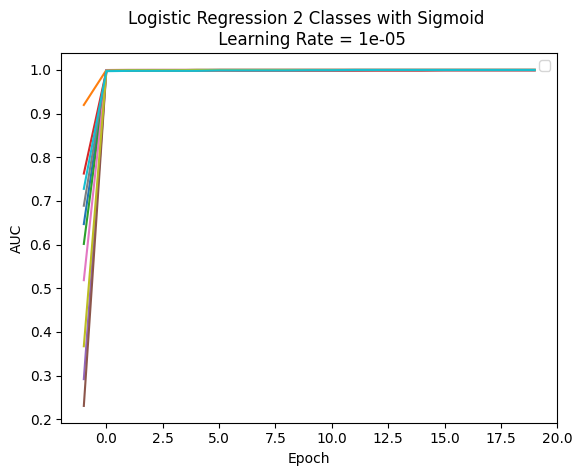


Test set: Avg. loss: 0.038260261048661905, AUC: 0.8113926099073991


Test set: Avg. loss: 0.0010428880264291246, AUC: 0.9860977254337858


Test set: Avg. loss: 0.0005602079573534341, AUC: 0.9948458149779735


Test set: Avg. loss: 0.00039719285412601263, AUC: 0.9964712757349635


Test set: Avg. loss: 0.0003310261254614972, AUC: 0.9968605592016543


Test set: Avg. loss: 0.00029360510708310644, AUC: 0.9970439629596332


Test set: Avg. loss: 0.00026559254097318534, AUC: 0.9971298210914322


Test set: Avg. loss: 0.00024433885447804244, AUC: 0.9971774701069854


Test set: Avg. loss: 0.0002277087939828282, AUC: 0.9981897869279871


Test set: Avg. loss: 0.00021414492041506666, AUC: 0.9982585633372292


Test set: Avg. loss: 0.0002031501955033476, AUC: 0.9982877820731817


Test set: Avg. loss: 0.00019434894793986146, AUC: 0.9983192484042076


Test set: Avg. loss: 0.00018707369729418564, AUC: 0.9983417243549403


Test set: Avg. loss: 0.00018079905786131008, AUC: 0.9983534118493212


Test set: Av


Test set: Avg. loss: 0.0001318118107850811, AUC: 0.999319877730828


Test set: Avg. loss: 0.0001270115375518799, AUC: 0.9993428032005753


Test set: Avg. loss: 0.0001228129113617025, AUC: 0.9993571878090444


Test set: Avg. loss: 0.00011909480270517915, AUC: 0.9993751685696305


Test set: Avg. loss: 0.00011574063773749145, AUC: 0.9993891036590848


Test set: Avg. loss: 0.00011267375077691202, AUC: 0.9993994425964219


Test set: Avg. loss: 0.00010985499115806099, AUC: 0.9994079834577003


Test set: Avg. loss: 0.00010723479666766968, AUC: 0.99941472624292


Test set: Avg. loss: 0.00010475694976887945, AUC: 0.9994237166232132


Test set: Avg. loss: 0.034932930587876776, AUC: 0.6225065180257124


Test set: Avg. loss: 0.0007824417406221935, AUC: 0.9875240492672839


Test set: Avg. loss: 0.0005106099108432202, AUC: 0.9958388024813449


Test set: Avg. loss: 0.00040938867956188556, AUC: 0.9970331745032815


Test set: Avg. loss: 0.0003657490895713193, AUC: 0.9973775060685067


Test set: Avg. l

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 4.7146970621942065e-05, AUC: 0.9999532500224759



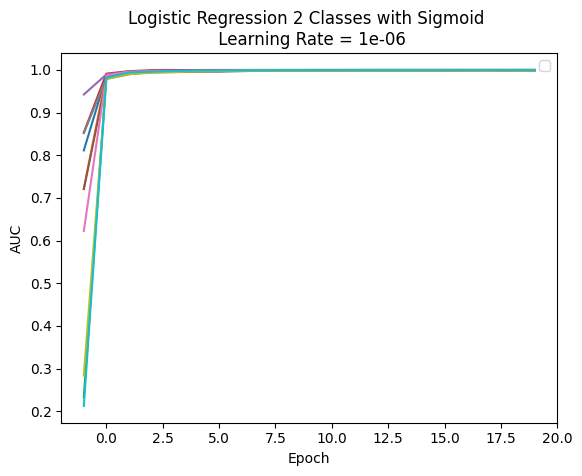


Test set: Avg. loss: 0.0186778810289171, AUC: 0.5242861638047289


Test set: Avg. loss: 0.010911544502204192, AUC: 0.6925739458779107


Test set: Avg. loss: 0.00694702703056606, AUC: 0.7943126854265935


Test set: Avg. loss: 0.004708693072587322, AUC: 0.8577901645239594


Test set: Avg. loss: 0.003361986686715561, AUC: 0.8970534028589409


Test set: Avg. loss: 0.0025306847783127012, AUC: 0.925971410590668


Test set: Avg. loss: 0.0019953610485608977, AUC: 0.9429407533938685


Test set: Avg. loss: 0.0016236117404685234, AUC: 0.9563984536545895


Test set: Avg. loss: 0.0013519077013570365, AUC: 0.9636046929785129


Test set: Avg. loss: 0.0011472808553817425, AUC: 0.9685138901375528


Test set: Avg. loss: 0.0009961462189965215, AUC: 0.9735476040636519


Test set: Avg. loss: 0.0008799249257883564, AUC: 0.9772484941113009


Test set: Avg. loss: 0.0007881846340553699, AUC: 0.9796961251460937


Test set: Avg. loss: 0.0007140170527406336, AUC: 0.9822125325901285


Test set: Avg. loss: 0.00065


Test set: Avg. loss: 0.0009816511021156402, AUC: 0.9860568192034523


Test set: Avg. loss: 0.0009334107662769075, AUC: 0.9871298210914321


Test set: Avg. loss: 0.0008906407559171637, AUC: 0.9885134406185382


Test set: Avg. loss: 0.0008523870585376207, AUC: 0.9894479906500044


Test set: Avg. loss: 0.0008178172804785113, AUC: 0.9908046390362311


Test set: Avg. loss: 0.0007862995279596208, AUC: 0.9911840330845995


Test set: Avg. loss: 0.0007573617124670222, AUC: 0.9919527105996584


Test set: Avg. loss: 0.0007306682302596721, AUC: 0.9922525397824328


Test set: Avg. loss: 0.025429970941926852, AUC: 0.4264308190236447


Test set: Avg. loss: 0.012723672023619884, AUC: 0.6821226287871978


Test set: Avg. loss: 0.006455450531438733, AUC: 0.8294376517126674


Test set: Avg. loss: 0.004064167757688121, AUC: 0.89473343522431


Test set: Avg. loss: 0.0029514533126326035, AUC: 0.9268704486199766


Test set: Avg. loss: 0.002271272330137573, AUC: 0.9470511552638676


Test set: Avg. loss: 0.001

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.00044891554025611695, AUC: 0.9910882855344781



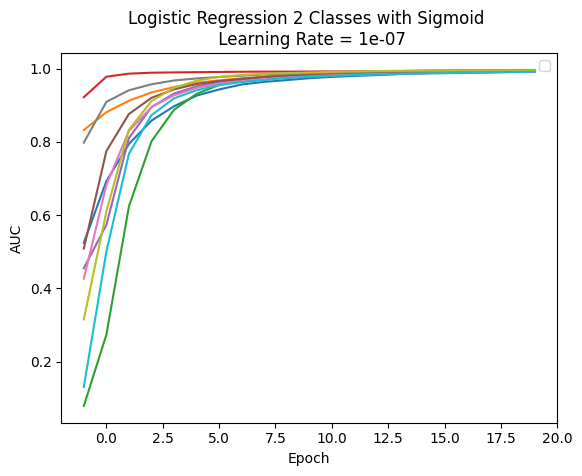

In [41]:
# SIGMOID 2 CLASS 

learning_rates = [0.1, 0.01, 0.001, 0.0001, 1e-5, 1e-6, 1e-7]

for learning_rate in learning_rates:
    aucs = []
    for i in range(10):
        model_aucs = []
        network = models.SigmoidLogisticRegression(NUM_CLASSES_REDUCED)
        optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
        _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network) 
        model_aucs.append(auc)
        for epoch in range(n_epochs):
            directory = f"{DIRECTORY}/sigmoid/{str(learning_rate)}/reduced{i}/model{epoch}"
            _, _ = train.train_sigmoid(epoch, train_loader_reduced,  network, optimizer, verbose=False, directory=directory)
            _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network)
            model_aucs.append(auc)
        aucs.append(model_aucs)
        plt.plot(np.arange(-1, n_epochs), aucs[i])
    np.save(f'{DIRECTORY}/sigmoid/{str(learning_rate)}/reduced{i}/aucs', aucs)
    plt.title("Logistic Regression 2 Classes with Sigmoid \n Learning Rate = " + str(learning_rate))
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()
    plt.show()


Test set: Avg. loss: 0.022266241827860134, AUC: 0.4862714501892632


Test set: Avg. loss: 796751.2712215321, AUC: 0.9733991932199612


Test set: Avg. loss: 510145.36645962734, AUC: 0.9807146562182507


Test set: Avg. loss: 395744.9026915114, AUC: 0.9833242595585431


Test set: Avg. loss: 305426.81573498965, AUC: 0.9890825341981283


Test set: Avg. loss: 289180.066252588, AUC: 0.9906997380751308


Test set: Avg. loss: 605963.486542443, AUC: 0.9681799865393766


Test set: Avg. loss: 512432.91097308486, AUC: 0.9728686989064315


Test set: Avg. loss: 292182.3519668737, AUC: 0.9885691871755411


Test set: Avg. loss: 501200.9689440994, AUC: 0.9801755882592498


Test set: Avg. loss: 259633.37474120082, AUC: 0.9917007111838917


Test set: Avg. loss: 270037.7308488613, AUC: 0.989065386907186


Test set: Avg. loss: 245634.9440993789, AUC: 0.9901349491797163


Test set: Avg. loss: 590505.2422360248, AUC: 0.9728686989064315


Test set: Avg. loss: 292721.5734989648, AUC: 0.9896901913208986


Test 


Test set: Avg. loss: 237124.69565217392, AUC: 0.9896130285116579


Test set: Avg. loss: 0.027890685182180464, AUC: 0.5683244524655662


Test set: Avg. loss: 850067.8592132506, AUC: 0.9624302855452624


Test set: Avg. loss: 434500.22360248445, AUC: 0.9765392908737832


Test set: Avg. loss: 907930.1366459627, AUC: 0.9509480308479764


Test set: Avg. loss: 281249.34161490685, AUC: 0.9849071688536607


Test set: Avg. loss: 258795.32919254657, AUC: 0.9906568698477748


Test set: Avg. loss: 261479.03933747413, AUC: 0.9885691871755411


Test set: Avg. loss: 867706.4347826086, AUC: 0.9582549202007947


Test set: Avg. loss: 366002.95652173914, AUC: 0.9859424365443065


Test set: Avg. loss: 276956.5962732919, AUC: 0.9917264321203053


Test set: Avg. loss: 314113.13457556936, AUC: 0.9864557835668938


Test set: Avg. loss: 216288.16563146998, AUC: 0.9896216021571292


Test set: Avg. loss: 289169.66045548656, AUC: 0.9880472665074826


Test set: Avg. loss: 292757.73913043475, AUC: 0.988141576607665

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 260165.06832298136, AUC: 0.990665443493246



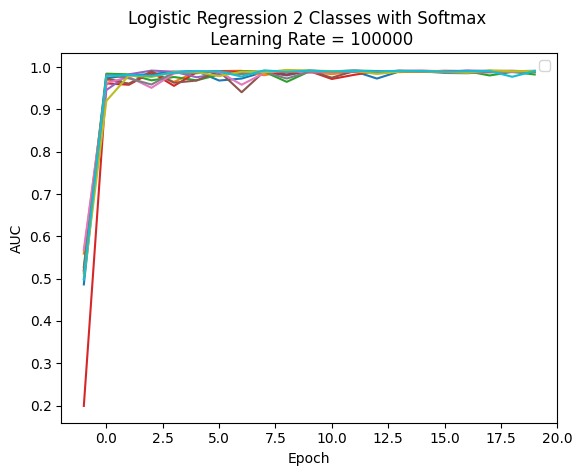

In [72]:
# SOFTMAX 2 CLASS  

learning_rates = [100000000]

for learning_rate in learning_rates:
    aucs = []
    for i in range(10):
        model_aucs = []
        network = models.SoftmaxLogisticRegression(NUM_CLASSES_REDUCED)
        optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
        _, auc = metric_utils.auc_softmax(test_loader_reduced, network) 
        model_aucs.append(auc)
        for epoch in range(n_epochs):
          #  directory = f"{DIRECTORY}/softmax/{str(learning_rate)}/reduced{i}/model{epoch}"
            directory=None
            _, _ = train.train_softmax(epoch, train_loader_reduced, network, optimizer, verbose=False, directory=directory)
            _, auc = metric_utils.auc_softmax(test_loader_reduced, network)
            model_aucs.append(auc)
        aucs.append(model_aucs)
        plt.plot(np.arange(-1, n_epochs), aucs[i])
   # np.save(f'{DIRECTORY}/softmax/{str(learning_rate)}/reduced{i}/aucs', aucs)
    plt.title("Logistic Regression 2 Classes with Softmax \n Learning Rate = " + str(learning_rate))
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()
    plt.show()